<a href="https://colab.research.google.com/github/Thierry-Hai-Son-ADAM/Alcohol-Crime_ML_Analytics/blob/main/ML_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Base de données - Rapport Statistiques.csv to Base de données - Rapport Statistiques.csv
Data summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pays                   157 non-null    object 
 1   Code                   157 non-null    object 
 2   Année                  157 non-null    int64  
 3   Consommation_d_Alcool  157 non-null    float64
 4   Taux_d_Homicide        157 non-null    float64
 5   PIB/Habitant           157 non-null    float64
 6   Taux_de_Chômage        157 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 8.7+ KB
None

Descriptive statistics:
             Année  Consommation_d_Alcool  Taux_d_Homicide   PIB/Habitant  \
count   157.000000             157.000000       157.000000     157.000000   
mean   2008.840764              10.162739         2.784268   39043.195

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Countries with potential alcohol-homicide relationship (R² > 0.5):
  Armenia: R² = 0.5306, Coefficient = -0.5682
  Croatia: R² = 0.9753, Coefficient = 0.5794
  Czechia: R² = 0.6609, Coefficient = 0.7978
  Iceland: R² = 0.8848, Coefficient = -1.2875
  Hungary: R² = 0.6953, Coefficient = 0.4597
  Germany: R² = 0.9788, Coefficient = 0.5477
  France: R² = 0.9189, Coefficient = 0.2737
  Slovenia: R² = 0.8054, Coefficient = 0.8862
  Slovakia: R² = 0.9718, Coefficient = 1.5275
  Russia: R² = 0.5534, Coefficient = 3.9912
  Romania: R² = 0.9360, Coefficient = 0.6747
  Italy: R² = 0.5406, Coefficient = 0.2159
  Portugal: R² = 0.6035, Coefficient = 0.1932
  Netherlands: R² = 0.9721, Coefficient = 0.2324
  Bosnia and Herzegovina: R² = 0.9309, Coefficient = -0.7823
  Denmark: R² = 0.5398, Coefficient = 0.1082
  Azerbaijan: R² = 0.9789, Coefficient = -2.7533
  Switzerland: R² = 0.9693, Coefficient = 0.2043
  North Macedonia: R² = 0.5960, Coefficient = -3.3047
  Greece: R² = 0.5398, Coefficient = 0.2

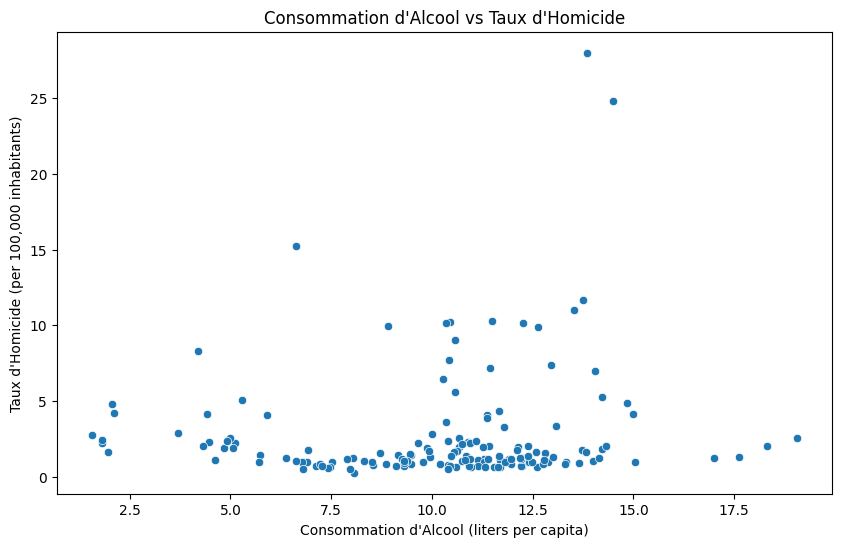

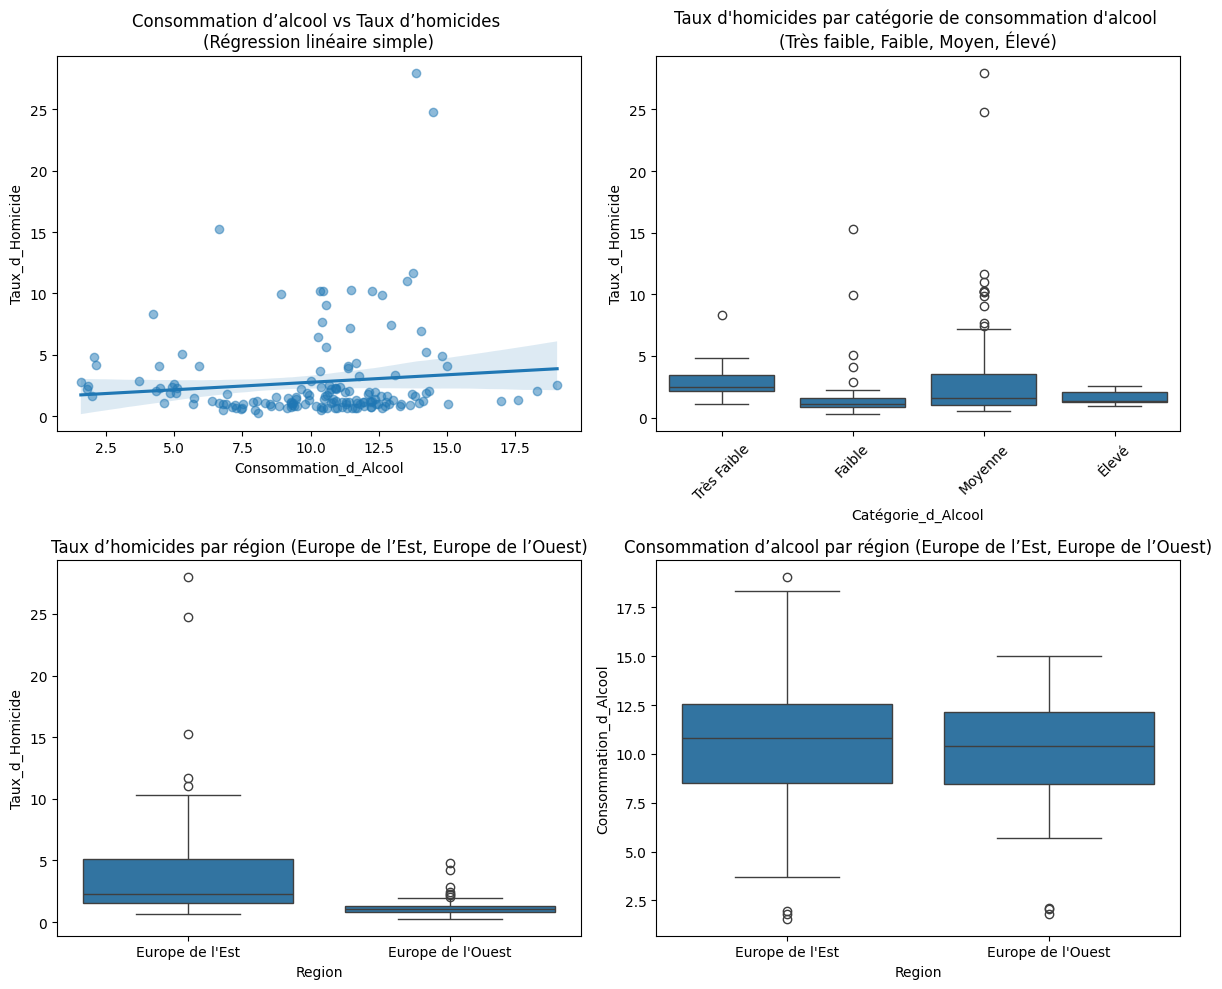

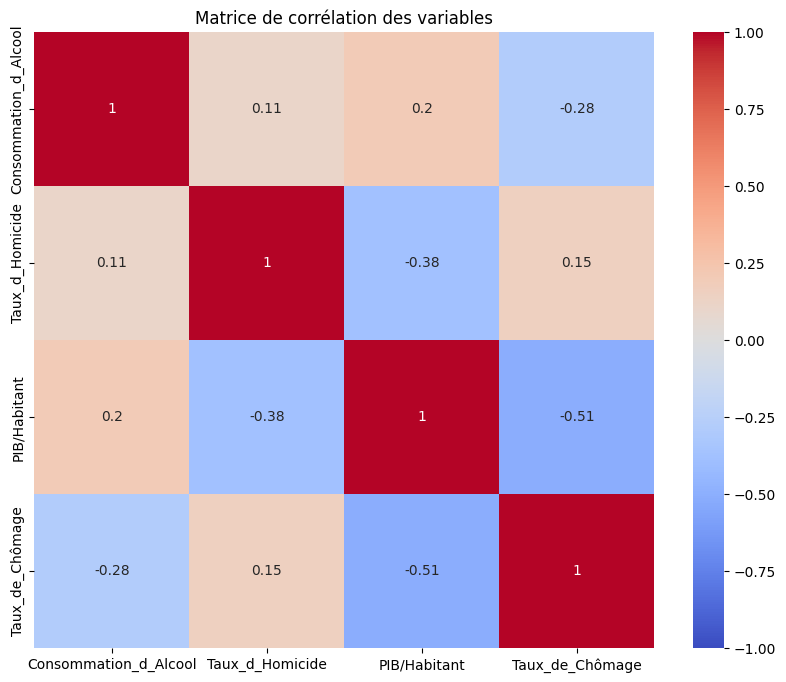

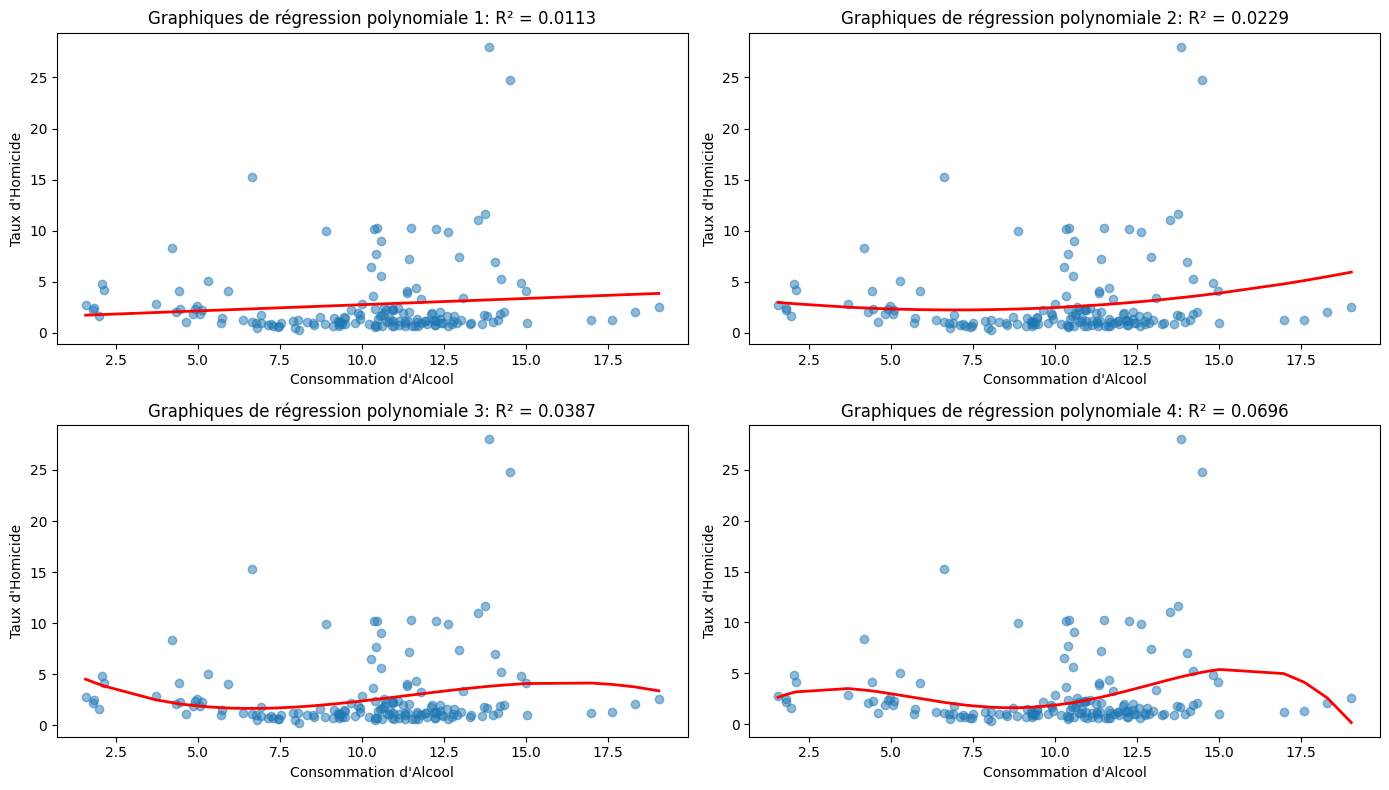

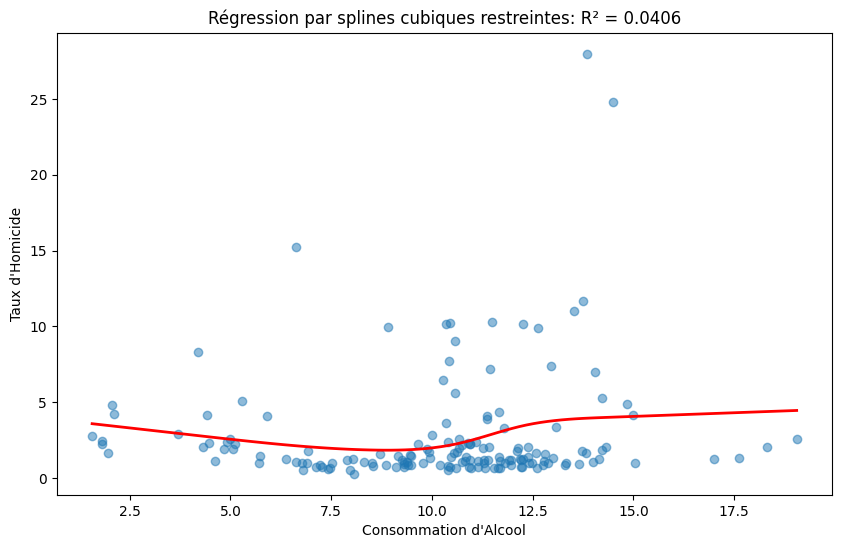

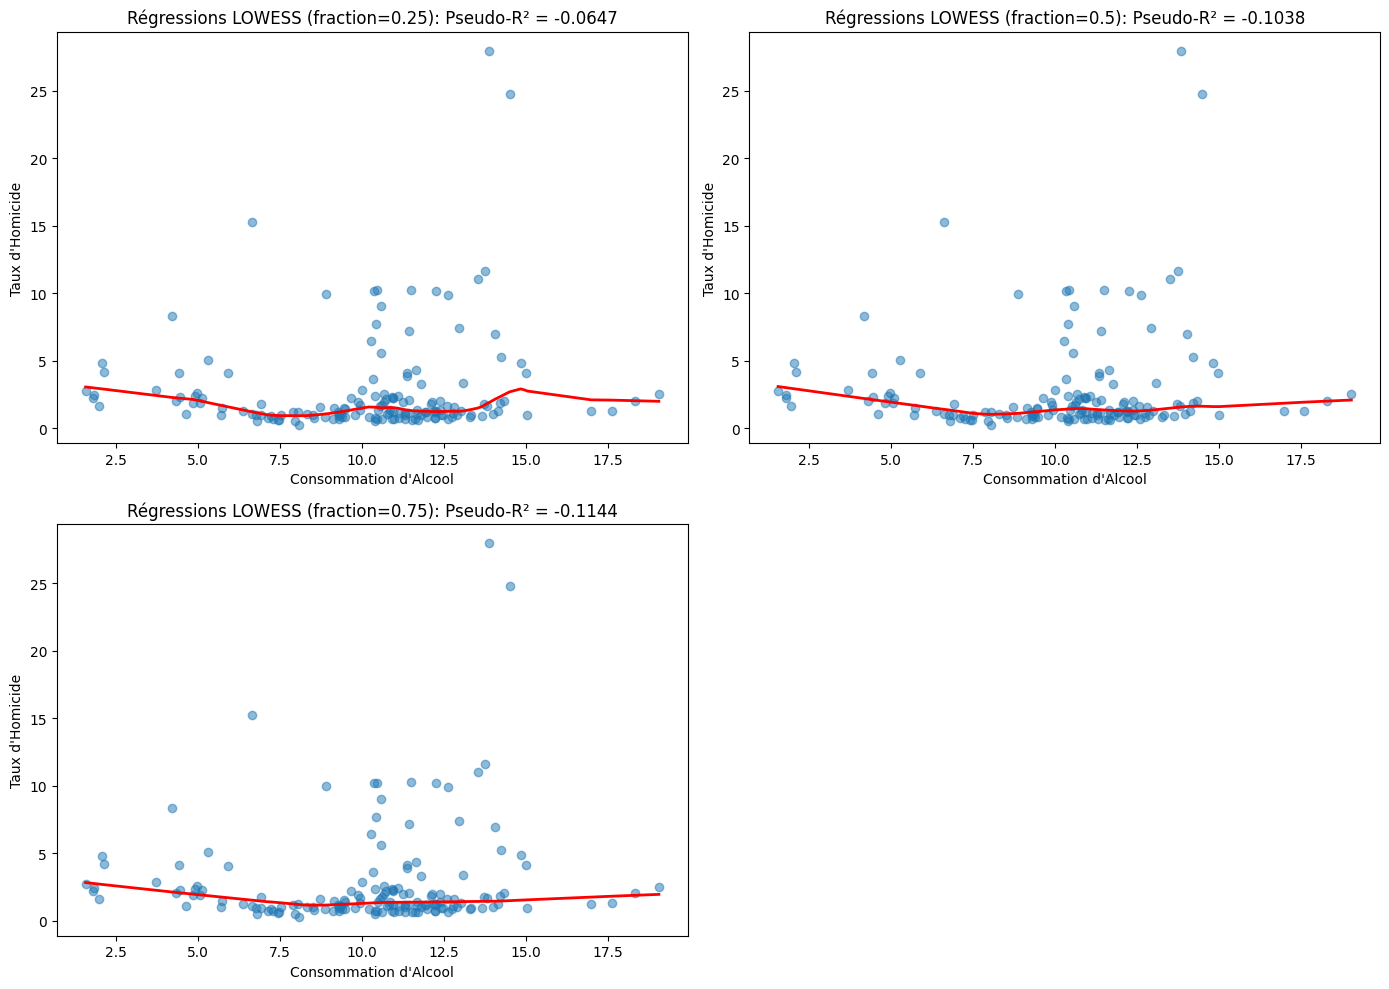

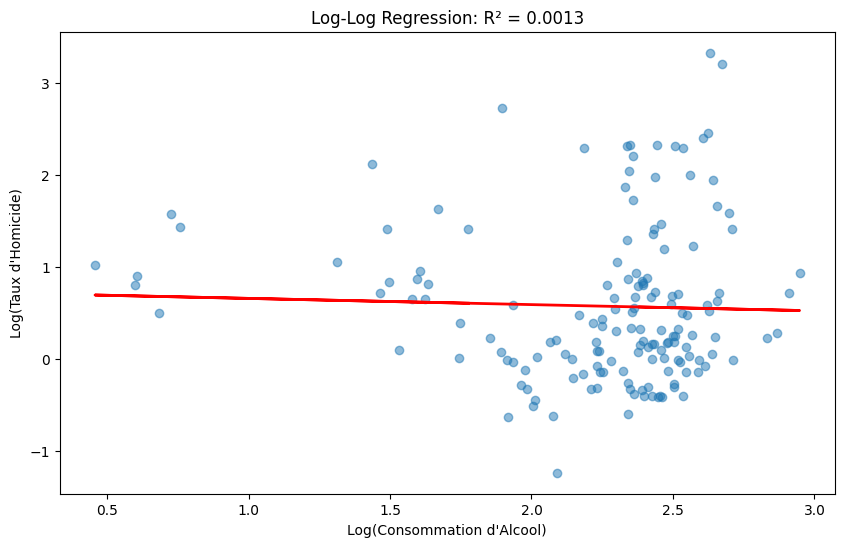

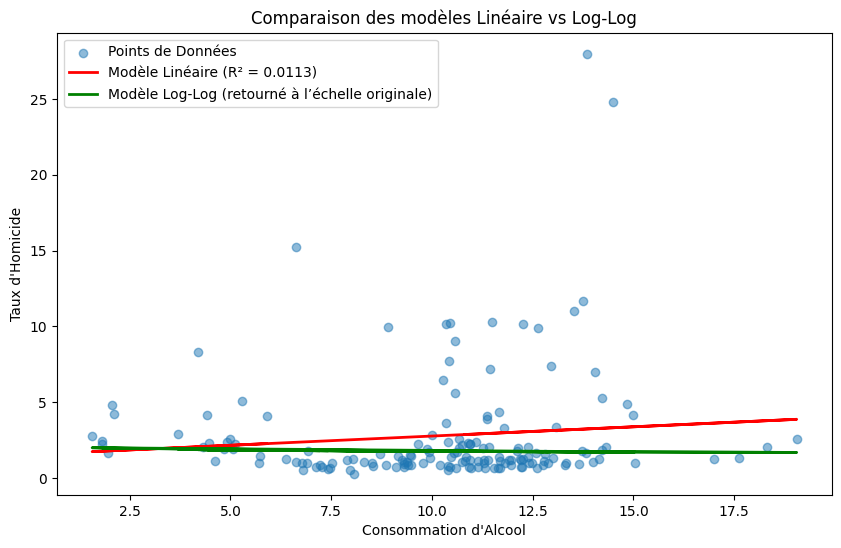

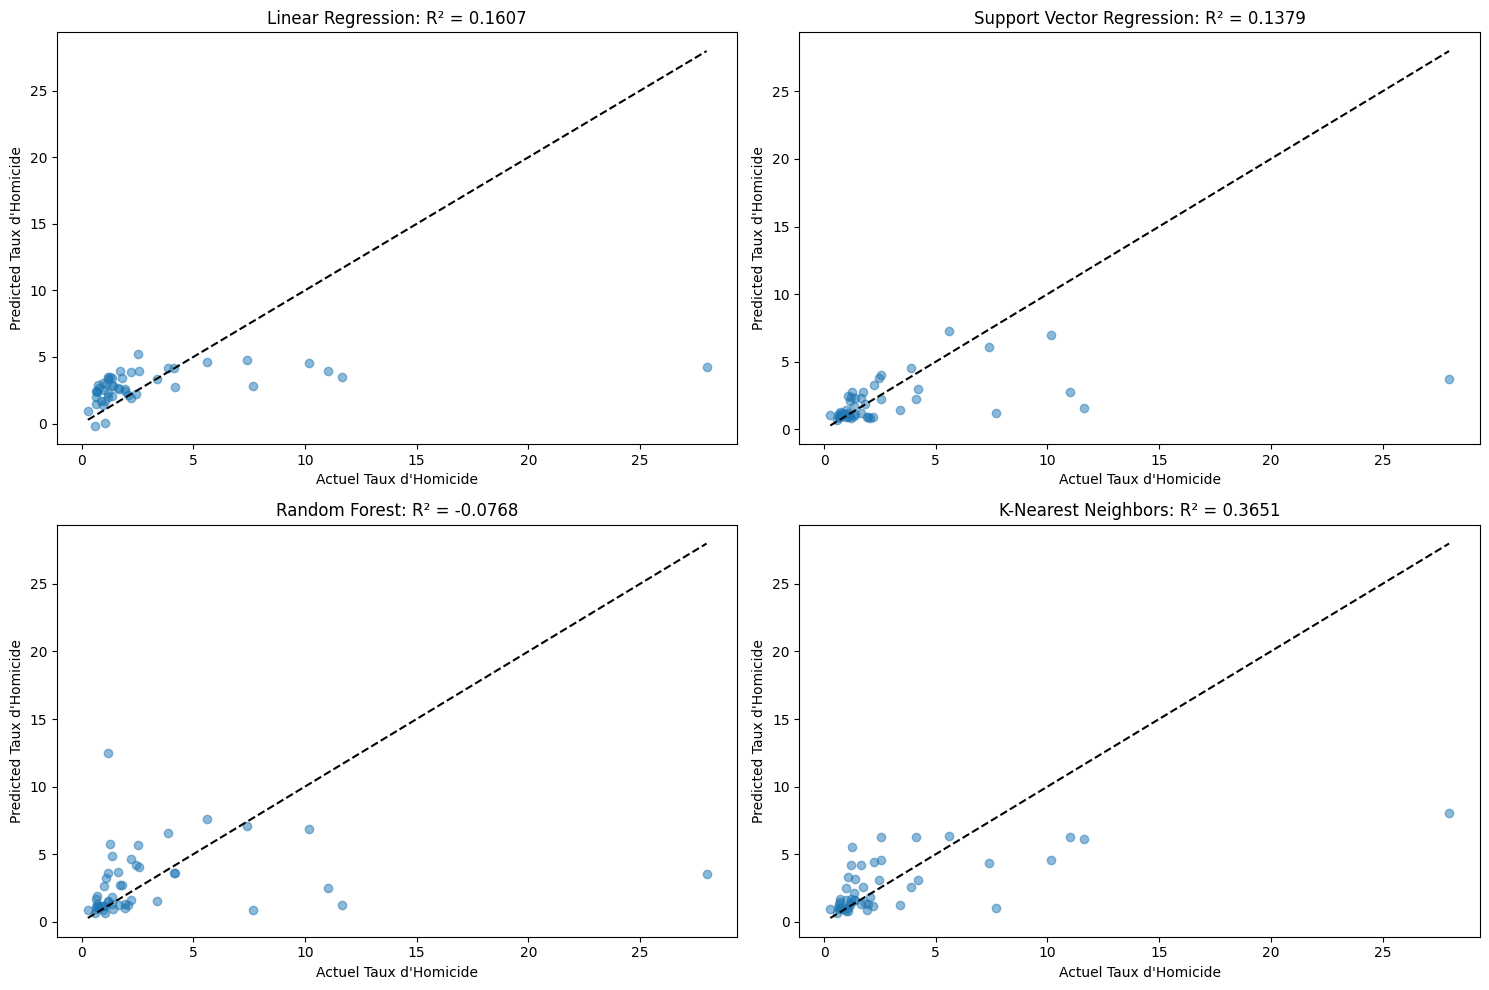

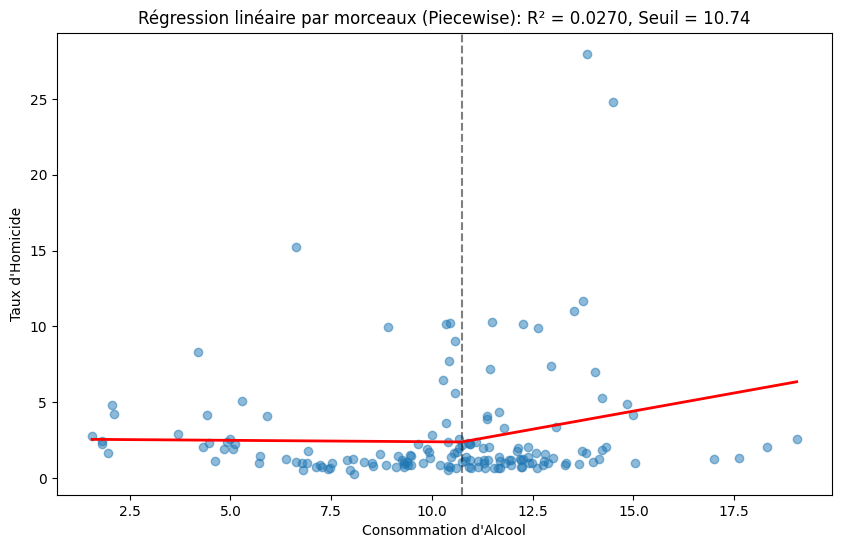

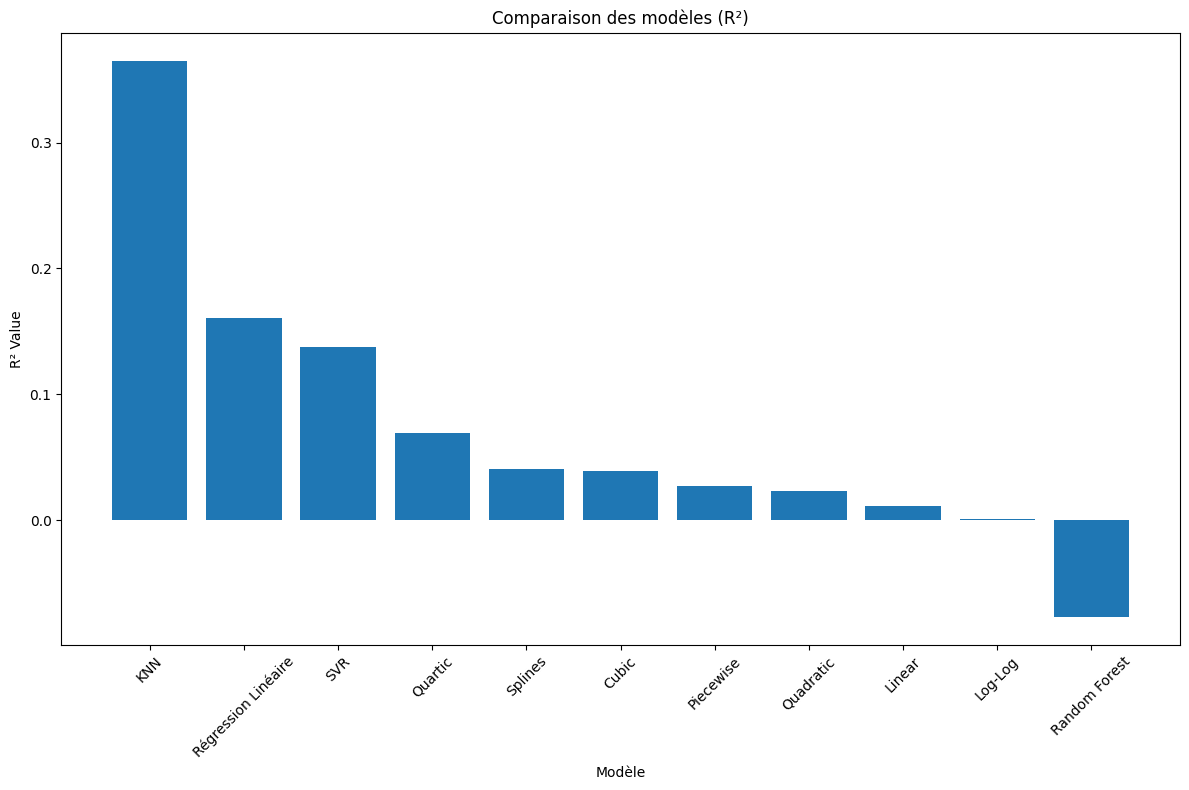

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
import statsmodels.api as sm
from google.colab import files
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.nonparametric.smoothers_lowess import lowess


uploaded = files.upload()
filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)

# Rename columns
data.columns = ['Pays', 'Code', 'Année', 'Consommation_d_Alcool', 'Taux_d_Homicide', 'PIB/Habitant', 'Taux_de_Chômage']

# Display basic information about the dataset
print("Data summary:")
print(data.info())
print("\nDescriptive statistics:")
print(data.describe())

# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

# 1. Basic correlation analysis
print("\n1. CORRELATION ANALYSIS")
correlation = data[['Consommation_d_Alcool', 'Taux_d_Homicide', 'PIB/Habitant', 'Taux_de_Chômage']].corr()
print("Pearson correlation matrix:")
print(correlation)

# 2. Visualize the relationship between Consommation d\'Alcool and Taux d\'Homicide
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Consommation_d_Alcool', y='Taux_d_Homicide', data=data)
plt.title('Consommation d\'Alcool vs Taux d\'Homicide')
plt.xlabel('Consommation d\'Alcool (liters per capita)')
plt.ylabel('Taux d\'Homicide (per 100,000 inhabitants)')
plt.savefig('alcohol_vs_homicide_scatter.png')

# 3. Simple linear regression
print("\n2. SIMPLE LINEAR REGRESSION")
X = data[['Consommation_d_Alcool']]
y = data['Taux_d_Homicide']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)
r_squared = model.score(X, y)

print(f"Coefficient (slope): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"R-squared: {r_squared:.4f}")

# Calculate p-value
n = len(data)
p = 1
t_stat = model.coef_[0] / (np.sqrt((1 - r_squared) / (n - p - 1)) * np.sqrt(1 / np.sum((X - X.mean()) ** 2)))
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), n - p - 1))
print(f"p-value: {p_value[0]:.4f}")

# 4. Multiple regression
print("\n3. MULTIPLE REGRESSION")
X_multi = data[['Consommation_d_Alcool', 'PIB/Habitant', 'Taux_de_Chômage']]
model_multi = LinearRegression()
model_multi.fit(X_multi, y)
r_squared_multi = model_multi.score(X_multi, y)

print(f"Multiple R-squared: {r_squared_multi:.4f}")
print("Coefficients:")
for i, col in enumerate(['Consommation_d_Alcool', 'PIB/Habitant', 'Taux_de_Chômage']):
    print(f"  {col}: {model_multi.coef_[i]:.6f}")
print(f"Intercept: {model_multi.intercept_:.4f}")

# Detailed regression statistics
model_stats = sm.OLS(y, sm.add_constant(X_multi)).fit()
print("\nDetailed statistics:")
print(model_stats.summary())

# 5. Check for outliers
print("\n4. OUTLIER ANALYSIS")
z_scores = stats.zscore(data[['Consommation_d_Alcool', 'Taux_d_Homicide']])
outliers = (abs(z_scores) > 3).any(axis=1)
print(f"Number of outliers (z-score > 3): {outliers.sum()}")
print("Outlier countries:")
print(data[outliers][['Pays', 'Année', 'Consommation_d_Alcool', 'Taux_d_Homicide']])

# 6. Analysis without outliers
print("\n5. ANALYSIS WITHOUT OUTLIERS")
data_no_outliers = data[~outliers].copy()
X_no_out = data_no_outliers[['Consommation_d_Alcool']]
y_no_out = data_no_outliers['Taux_d_Homicide']

model_no_out = LinearRegression()
model_no_out.fit(X_no_out, y_no_out)
r_squared_no_out = model_no_out.score(X_no_out, y_no_out)

print(f"R-squared without outliers: {r_squared_no_out:.4f}")
print(f"Coefficient: {model_no_out.coef_[0]:.4f}")
print(f"Intercept: {model_no_out.intercept_:.4f}")

# 7. Non-linear relationship analysis
print("\n6. NON-LINEAR RELATIONSHIP ANALYSIS")
# Log transformation
data['Log_Taux_d_Homicide'] = np.log1p(data['Taux_d_Homicide'])

X_log = data[['Consommation_d_Alcool']]
y_log = data['Log_Taux_d_Homicide']

model_log = LinearRegression()
model_log.fit(X_log, y_log)
r_squared_log = model_log.score(X_log, y_log)

print(f"R-squared with log-transformed Taux d\'Homicide: {r_squared_log:.4f}")

# 8. Analyze by Year to see if the relationship changes over time
print("\n7. ANALYSIS BY Année")
Années = data['Année'].unique()
for Année in Années:
    Année_data = data[data['Année'] == Année]
    if len(Année_data) > 5:
        X_Année = Année_data[['Consommation_d_Alcool']]
        y_Année = Année_data['Taux_d_Homicide']

        model_Année = LinearRegression()
        model_Année.fit(X_Année, y_Année)
        r_squared_Année = model_Année.score(X_Année, y_Année)

        print(f"Année {Année}: R-squared = {r_squared_Année:.4f}, Coefficient = {model_Année.coef_[0]:.4f}")

# 9. Regional analysis
print("\n8. ANALYSIS BY REGION")
# Let's create a simple East/West Europe split as an example
east_europe = ['Albania', 'Armenia', 'Azerbaijan', 'Belarus', 'Bulgaria', 'Croatia', 'Czechia',
               'Estonia', 'Georgia', 'Hungary', 'Kazakhstan', 'Latvia', 'Lithuania',
               'Moldova', 'Montenegro', 'Poland', 'Romania', 'Russia', 'Serbia',
               'Slovakia', 'Slovenia', 'Ukraine', 'North Macedonia', 'Bosnia and Herzegovina']

data['Region'] = data['Pays'].apply(lambda x: 'Europe de l\'Est' if x in east_europe else 'Europe de l\'Ouest')

for region in data['Region'].unique():
    region_data = data[data['Region'] == region]
    X_region = region_data[['Consommation_d_Alcool']]
    y_region = region_data['Taux_d_Homicide']

    model_region = LinearRegression()
    model_region.fit(X_region, y_region)
    r_squared_region = model_region.score(X_region, y_region)

    print(f"Region {region}: R-squared = {r_squared_region:.4f}, Coefficient = {model_region.coef_[0]:.4f}")

# 10. Spearman rank correlation
print("\n9. SPEARMAN RANK CORRELATION")
spearman_corr, spearman_p = stats.spearmanr(data['Consommation_d_Alcool'], data['Taux_d_Homicide'])
print(f"Spearman correlation: {spearman_corr:.4f}")
print(f"p-value: {spearman_p:.4f}")

# 11. Kendall's Tau
print("\n10. KENDALL'S TAU CORRELATION")
kendall_corr, kendall_p = stats.kendalltau(data['Consommation_d_Alcool'], data['Taux_d_Homicide'])
print(f"Kendall's tau: {kendall_corr:.4f}")
print(f"p-value: {kendall_p:.4f}")

# 12. Multiple regression with standardized variables
print("\n11. STANDARDIZED VARIABLES ANALYSIS")
scaler = StandardScaler()
X_std = scaler.fit_transform(data[['Consommation_d_Alcool', 'PIB/Habitant', 'Taux_de_Chômage']])
X_std_df = pd.DataFrame(X_std, columns=['Consommation_d_Alcool_std', 'PIB/Habitant_std', 'Taux_de_Chômage_std'])

model_std = LinearRegression()
model_std.fit(X_std, y)
r_squared_std = model_std.score(X_std, y)

print(f"R-squared with standardized variables: {r_squared_std:.4f}")
print("Standardized coefficients:")
for i, col in enumerate(['Consommation_d_Alcool', 'PIB/Habitant', 'Taux_de_Chômage']):
    print(f"  {col}: {model_std.coef_[i]:.4f}")

# 13. Pays-specific analysis
print("\n12. Pays-SPECIFIC ANALYSIS")
countries_with_enough_data = data['Pays'].value_counts()[data['Pays'].value_counts() >= 3].index.tolist()

significant_countries = []
for Pays in countries_with_enough_data:
    Pays_data = data[data['Pays'] == Pays]
    if len(Pays_data) >= 3:
        X_Pays = Pays_data[['Consommation_d_Alcool']]
        y_Pays = Pays_data['Taux_d_Homicide']

        if X_Pays.std().iloc[0] > 0:
            model_Pays = LinearRegression()
            model_Pays.fit(X_Pays, y_Pays)
            r_squared_Pays = model_Pays.score(X_Pays, y_Pays)

            if r_squared_Pays > 0.5:
                significant_countries.append((Pays, r_squared_Pays, model_Pays.coef_[0]))

if significant_countries:
    print("Countries with potential alcohol-homicide relationship (R² > 0.5):")
    for Pays, r2, coef in significant_countries:
        print(f"  {Pays}: R² = {r2:.4f}, Coefficient = {coef:.4f}")
else:
    print("No countries showed a strong relationship between alcohol and Taux d\'Homicides.")

# 14. Thresholds analysis: Does the relationship change at different levels of Consommation d\'Alcool?
print("\n13. THRESHOLD ANALYSIS")
data['Catégorie_d_Alcool'] = pd.cut(data['Consommation_d_Alcool'],
                                 bins=[0, 5, 10, 15, 20],
                                 labels=['Très Faible', 'Faible', 'Moyenne', 'Élevé'])

for category in data['Catégorie_d_Alcool'].dropna().unique():
    category_data = data[data['Catégorie_d_Alcool'] == category]
    if len(category_data) > 5:  # Only if we have enough countries in this category
        X_cat = category_data[['Consommation_d_Alcool']]
        y_cat = category_data['Taux_d_Homicide']

        model_cat = LinearRegression()
        model_cat.fit(X_cat, y_cat)
        r_squared_cat = model_cat.score(X_cat, y_cat)

        print(f"Consommation d\'Alcool category '{category}': R-squared = {r_squared_cat:.4f}, Coefficient = {model_cat.coef_[0]:.4f}")

# 15. ANOVA for Taux d\'Homicides across Consommation d\'Alcool categories
print("\n14. ANOVA ANALYSIS")
groups = [data[data['Catégorie_d_Alcool'] == cat]['Taux_d_Homicide'].values for cat in data['Catégorie_d_Alcool'].dropna().unique()]
f_stat, p_value_anova = stats.f_oneway(*groups)
print(f"ANOVA results: F-statistic = {f_stat:.4f}, p-value = {p_value_anova:.4f}")

# 16. Time series analysis for selected countries with complete data for all Years
print("\n15. TIME SERIES PATTERNS")
complete_countries = []
for Pays in data['Pays'].unique():
    if data[data['Pays'] == Pays]['Année'].nunique() >= 3:
        complete_countries.append(Pays)

if complete_countries:
    print(f"Countries with data for multiple Années: {len(complete_countries)}")
    print("Temporal patterns in selected countries:")

    for Pays in complete_countries[:5]:
        Pays_data = data[data['Pays'] == Pays].sort_values('Année')
        print(f"\n{Pays}:")
        print("Année\tAlcohol\tHomicide")
        for _, row in Pays_data.iterrows():
            print(f"{int(row['Année'])}\t{row['Consommation_d_Alcool']:.2f}\t{row['Taux_d_Homicide']:.2f}")

# 17. Summary of findings
print("\n16. SUMMARY OF FINDINGS")
print(f"1. Pearson correlation between Consommation d\'Alcool and Taux d\'Homicide: {correlation.loc['Consommation_d_Alcool', 'Taux_d_Homicide']:.4f}")
print(f"2. Simple linear regression R-squared: {r_squared:.4f}")
print(f"3. Multiple regression R-squared (with GDP and unemployment): {r_squared_multi:.4f}")
print(f"4. Spearman rank correlation: {spearman_corr:.4f}")
print(f"5. Analysis without outliers R-squared: {r_squared_no_out:.4f}")
print(f"6. Log-transformed Taux d\'Homicide R-squared: {r_squared_log:.4f}")
print(f"7. ANOVA p-value across Consommation d\'Alcool categories: {p_value_anova:.4f}")

# Plot key relationships
plt.figure(figsize=(12, 10))

# Plot 1: Scatterplot with regression line
plt.subplot(2, 2, 1)
sns.regplot(x='Consommation_d_Alcool', y='Taux_d_Homicide', data=data, scatter_kws={'alpha':0.5})
plt.title('Consommation d’alcool vs Taux d’homicides \n(Régression linéaire simple)')

# Plot 2: Boxplot of Taux d\'Homicides by alcohol category
plt.subplot(2, 2, 2)
sns.boxplot(x='Catégorie_d_Alcool', y='Taux_d_Homicide', data=data)
plt.title('Taux d\'homicides par catégorie de consommation d\'alcool \n(Très faible, Faible, Moyen, Élevé)')
plt.xticks(rotation=45)

# Plot 3: Taux d\'Homicides by region
plt.subplot(2, 2, 3)
sns.boxplot(x='Region', y='Taux_d_Homicide', data=data)
plt.title('Taux d’homicides par région (Europe de l’Est, Europe de l’Ouest)')

# Plot 4: Consommation d\'Alcool by region
plt.subplot(2, 2, 4)
sns.boxplot(x='Region', y='Consommation_d_Alcool', data=data)
plt.title('Consommation d’alcool par région (Europe de l’Est, Europe de l’Ouest)')

plt.tight_layout()
plt.savefig('analysis_summary_plots.png')

# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de corrélation des variables')
plt.savefig('correlation_heatmap.png')

# 1. POLYNOMIAL REGRESSION
print("1. POLYNOMIAL REGRESSION ANALYSIS")

# Setup for polynomial regression
X = data[['Consommation_d_Alcool']].values
y = data['Taux_d_Homicide'].values

# Test different polynomial degrees
results = []
degrees = [1, 2, 3, 4]  # Linear, quadratic, cubic, quartic
plt.figure(figsize=(14, 8))

for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Fit polynomial regression
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)

    # Calculate metrics
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    results.append((degree, r2, rmse))

    # Plot
    plt.subplot(2, 2, i+1)
    plt.scatter(X, y, alpha=0.5)

    # Sort X for smooth curve plotting
    X_sorted = np.sort(X, axis=0)
    X_poly_sorted = poly.transform(X_sorted)
    y_poly_sorted = model.predict(X_poly_sorted)

    plt.plot(X_sorted, y_poly_sorted, color='red', linewidth=2)
    plt.title(f'Graphiques de régression polynomiale {degree}: R² = {r2:.4f}')
    plt.xlabel('Consommation d\'Alcool')
    plt.ylabel('Taux d\'Homicide')

plt.tight_layout()
plt.savefig('polynomial_regression_plots.png')

# Print results
print("\nPolynomial Regression Results:")
for degree, r2, rmse in results:
    print(f"Degree {degree}: R² = {r2:.4f}, RMSE = {rmse:.4f}")

# Check if higher-degree polynomials are significantly better
print("\nF-test for nested models:")
for i in range(1, len(degrees)):
    # Get residuals from simpler and more complex models
    simple_degree = degrees[i-1]
    complex_degree = degrees[i]

    poly_simple = PolynomialFeatures(degree=simple_degree)
    X_poly_simple = poly_simple.fit_transform(X)
    model_simple = LinearRegression()
    model_simple.fit(X_poly_simple, y)
    residuals_simple = y - model_simple.predict(X_poly_simple)
    ssr_simple = np.sum(residuals_simple**2)

    poly_complex = PolynomialFeatures(degree=complex_degree)
    X_poly_complex = poly_complex.fit_transform(X)
    model_complex = LinearRegression()
    model_complex.fit(X_poly_complex, y)
    residuals_complex = y - model_complex.predict(X_poly_complex)
    ssr_complex = np.sum(residuals_complex**2)

    # F-test
    df1 = complex_degree - simple_degree
    df2 = len(y) - complex_degree - 1
    f_stat = ((ssr_simple - ssr_complex) / df1) / (ssr_complex / df2)
    p_value = 1 - stats.f.cdf(f_stat, df1, df2)

    print(f"Comparing degree {simple_degree} vs {complex_degree}:")
    print(f"  F-statistic: {f_stat:.4f}")
    print(f"  p-value: {p_value:.4f}")
    print(f"  {'Significant improvement' if p_value < 0.05 else 'No significant improvement'}")

# 2. SPLINE REGRESSION
print("\n2. SPLINE REGRESSION (RESTRICTED CUBIC SPLINES)")

# Create a function to generate restricted cubic spline features
def rcspline_transform(x, knots):
    """Transform x using restricted cubic splines with specified knots."""
    x = np.asarray(x).flatten()
    basis = np.zeros((len(x), len(knots) - 2))
    for i in range(len(knots) - 2):
        basis[:, i] = compute_spline_basis(x, knots, i)
    return basis

def compute_spline_basis(x, knots, i):
    """Compute a single basis function for restricted cubic splines."""
    k = knots
    l = len(k)
    t1 = ((x - k[i])**3) * (x > k[i])
    t2 = ((x - k[l-2])**3) * (x > k[l-2]) * (k[l-1] - k[i]) / (k[l-1] - k[l-2])
    t3 = ((x - k[l-1])**3) * (x > k[l-1]) * (k[l-2] - k[i]) / (k[l-1] - k[l-2])
    return t1 - t2 + t3

# Define knots at quartiles of Consommation d\'Alcool
alcohol_knots = np.percentile(data['Consommation_d_Alcool'], [5, 25, 50, 75, 95])
spline_features = rcspline_transform(data['Consommation_d_Alcool'], alcohol_knots)

# Combine with original feature
X_spline = np.column_stack([data['Consommation_d_Alcool'], spline_features])
X_spline = sm.add_constant(X_spline)  # Add intercept

# Fit spline model
spline_model = sm.OLS(data['Taux_d_Homicide'], X_spline).fit()
print(spline_model.summary())

# Create a range of alcohol values for prediction
alcohol_range = np.linspace(data['Consommation_d_Alcool'].min(), data['Consommation_d_Alcool'].max(), 100)
spline_range_features = rcspline_transform(alcohol_range, alcohol_knots)
X_spline_range = np.column_stack([alcohol_range, spline_range_features])
X_spline_range = sm.add_constant(X_spline_range)

# Predict using the spline model
spline_predictions = spline_model.predict(X_spline_range)

# Plot spline regression
plt.figure(figsize=(10, 6))
plt.scatter(data['Consommation_d_Alcool'], data['Taux_d_Homicide'], alpha=0.5)
plt.plot(alcohol_range, spline_predictions, 'r-', linewidth=2)
plt.title(f'Régression par splines cubiques restreintes: R² = {spline_model.rsquared:.4f}')
plt.xlabel('Consommation d\'Alcool')
plt.ylabel('Taux d\'Homicide')
plt.savefig('spline_regression_plot.png')

# 3. LOESS / LOWESS (Locally Weighted Scatterplot Smoothing)
print("\n3. LOWESS REGRESSION (LOCAL REGRESSION)")

# Apply LOWESS smoothing with different fractions
fractions = [0.25, 0.5, 0.75]
plt.figure(figsize=(14, 10))

for i, frac in enumerate(fractions):
    # Fit LOWESS
    lowess_result = lowess(data['Taux_d_Homicide'], data['Consommation_d_Alcool'], frac=frac, it=3)

    # Extract smoothed values
    lowess_x = lowess_result[:, 0]
    lowess_y = lowess_result[:, 1]

    # Calculate pseudo-R² for LOWESS
    # Using the smoothed predictions at the original x-values
    indices = np.searchsorted(lowess_x, data['Consommation_d_Alcool'])
    indices = np.clip(indices, 0, len(lowess_y) - 1)
    y_pred = lowess_y[indices]

    ss_total = np.sum((data['Taux_d_Homicide'] - data['Taux_d_Homicide'].mean())**2)
    ss_residual = np.sum((data['Taux_d_Homicide'] - y_pred)**2)
    r_squared = 1 - (ss_residual / ss_total)

    print(f"Fraction = {frac}: Pseudo-R² = {r_squared:.4f}")

    # Plot
    plt.subplot(2, 2, i+1)
    plt.scatter(data['Consommation_d_Alcool'], data['Taux_d_Homicide'], alpha=0.5)
    plt.plot(lowess_x, lowess_y, 'r-', linewidth=2)
    plt.title(f'Régressions LOWESS (fraction={frac}): Pseudo-R² = {r_squared:.4f}')
    plt.xlabel('Consommation d\'Alcool')
    plt.ylabel('Taux d\'Homicide')

plt.tight_layout()
plt.savefig('lowess_regression_plots.png')

# 4. LOG-LOG TRANSFORMATION (power law relationship)
print("\n4. LOG-LOG TRANSFORMATION ANALYSIS")

# Add small constant to handle zeros before log transformation
data['Log_Alcohol'] = np.log(data['Consommation_d_Alcool'] + 0.01)
data['Log_Homicide'] = np.log(data['Taux_d_Homicide'] + 0.01)

# Fit log-log model
X_log = sm.add_constant(data['Log_Alcohol'])
log_model = sm.OLS(data['Log_Homicide'], X_log).fit()
print(log_model.summary())

# Plot log-log relationship
plt.figure(figsize=(10, 6))
plt.scatter(data['Log_Alcohol'], data['Log_Homicide'], alpha=0.5)
plt.plot(data['Log_Alcohol'], log_model.predict(X_log), 'r-', linewidth=2)
plt.title(f'Log-Log Regression: R² = {log_model.rsquared:.4f}')
plt.xlabel('Log(Consommation d\'Alcool)')
plt.ylabel('Log(Taux d\'Homicide)')
plt.savefig('log_log_regression_plot.png')

# Original scale predictions for comparison
X_original = sm.add_constant(data['Consommation_d_Alcool'])
original_model = sm.OLS(data['Taux_d_Homicide'], X_original).fit()

plt.figure(figsize=(10, 6))
plt.scatter(data['Consommation_d_Alcool'], data['Taux_d_Homicide'], alpha=0.5, label='Points de Données')
plt.plot(data['Consommation_d_Alcool'], original_model.predict(X_original), 'r-', linewidth=2, label=f'Modèle Linéaire (R² = {original_model.rsquared:.4f})')

# Convert log predictions back to original scale
log_predictions_original = np.exp(log_model.predict(X_log)) - 0.01
plt.plot(data['Consommation_d_Alcool'], log_predictions_original, 'g-', linewidth=2, label='Modèle Log-Log (retourné à l’échelle originale)')

plt.title('Comparaison des modèles Linéaire vs Log-Log')
plt.xlabel('Consommation d\'Alcool')
plt.ylabel('Taux d\'Homicide')
plt.legend()
plt.savefig('linear_vs_log_comparison.png')

# 5. MACHINE LEARNING MODELS
print("\n5. ADVANCED NON-LINEAR MODELS")

# Prepare data
X_ml = data[['Consommation_d_Alcool', 'PIB/Habitant', 'Taux_de_Chômage']]
y_ml = data['Taux_d_Homicide']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_ml, y_ml, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store model results
model_results = {}

# a. Support Vector Regression
print("\na. Support Vector Regression")
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)
svr_pred = svr_model.predict(X_test_scaled)
svr_r2 = r2_score(y_test, svr_pred)
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_pred))
model_results['SVR'] = (svr_r2, svr_rmse)
print(f"SVR R²: {svr_r2:.4f}, RMSE: {svr_rmse:.4f}")

# b. Random Forest Regression
print("\nb. Random Forest Regression")
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
model_results['Random Forest'] = (rf_r2, rf_rmse)
print(f"Random Forest R²: {rf_r2:.4f}, RMSE: {rf_rmse:.4f}")

# Feature importance
feature_importance = pd.DataFrame({'Feature': X_ml.columns,
                                'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print("\nRandom Forest Feature Importance:")
print(feature_importance)

# c. K-Nearest Neighbors Regression
print("\nc. K-Nearest Neighbors Regression")
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
knn_r2 = r2_score(y_test, knn_pred)
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_pred))
model_results['KNN'] = (knn_r2, knn_rmse)
print(f"KNN R²: {knn_r2:.4f}, RMSE: {knn_rmse:.4f}")

# Plot predictions vs. Actuel for all models
plt.figure(figsize=(15, 10))

# Linear regression for comparison
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
model_results['Régression Linéaire'] = (lr_r2, lr_rmse)

# Plot Actuel vs predicted for each model
plt.subplot(2, 2, 1)
plt.scatter(y_test, lr_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title(f'Linear Regression: R² = {lr_r2:.4f}')
plt.xlabel('Actuel Taux d\'Homicide')
plt.ylabel('Predicted Taux d\'Homicide')

plt.subplot(2, 2, 2)
plt.scatter(y_test, svr_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title(f'Support Vector Regression: R² = {svr_r2:.4f}')
plt.xlabel('Actuel Taux d\'Homicide')
plt.ylabel('Predicted Taux d\'Homicide')

plt.subplot(2, 2, 3)
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title(f'Random Forest: R² = {rf_r2:.4f}')
plt.xlabel('Actuel Taux d\'Homicide')
plt.ylabel('Predicted Taux d\'Homicide')

plt.subplot(2, 2, 4)
plt.scatter(y_test, knn_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title(f'K-Nearest Neighbors: R² = {knn_r2:.4f}')
plt.xlabel('Actuel Taux d\'Homicide')
plt.ylabel('Predicted Taux d\'Homicide')

plt.tight_layout()
plt.savefig('model_comparison_plots.png')

# 6. PIECEWISE LINEAR REGRESSION (SEGMENTED REGRESSION)
print("\n6. PIECEWISE LINEAR REGRESSION")

def piecewise_linear(x, x0, y0, k1, k2):
    """Piecewise linear function with one breakpoint."""
    return np.where(x < x0, y0 + k1 * (x - x0), y0 + k2 * (x - x0))

def fit_piecewise(x, y):
    """Find the optimal breakpoint for a piecewise linear fit."""

    # Sort data by x values
    idx = np.argsort(x)
    x_sorted = x[idx]
    y_sorted = y[idx]

    # Try different breakpoints and find the one with the lowest error
    best_error = float('inf')
    best_breakpoint = None
    best_params = None

    # Test breakpoints from 10th to 90th percentile
    test_points = x_sorted[int(len(x) * 0.1):int(len(x) * 0.9)]

    for breakpoint in test_points:
        left_idx = x_sorted < breakpoint
        right_idx = x_sorted >= breakpoint

        if sum(left_idx) < 5 or sum(right_idx) < 5:
            continue  # Skip if not enough points on either side

        # Fit left segment
        if sum(left_idx) > 1:  # Need at least 2 points for regression
            left_model = LinearRegression()
            left_model.fit(x_sorted[left_idx].reshape(-1, 1), y_sorted[left_idx])
            k1 = left_model.coef_[0]
        else:
            k1 = 0

        # Fit right segment
        if sum(right_idx) > 1:  # Need at least 2 points for regression
            right_model = LinearRegression()
            right_model.fit(x_sorted[right_idx].reshape(-1, 1), y_sorted[right_idx])
            k2 = right_model.coef_[0]
        else:
            k2 = 0

        # Get y-value at breakpoint (ensures continuity)
        if sum(left_idx) > 0:
            y0_left = y_sorted[left_idx][-1]
        else:
            y0_left = y_sorted[0]

        if sum(right_idx) > 0:
            y0_right = y_sorted[right_idx][0]
        else:
            y0_right = y_sorted[-1]

        y0 = (y0_left + y0_right) / 2

        # Evaluate error
        y_pred = piecewise_linear(x_sorted, breakpoint, y0, k1, k2)
        error = np.sum((y_sorted - y_pred)**2)

        if error < best_error:
            best_error = error
            best_breakpoint = breakpoint
            best_params = (breakpoint, y0, k1, k2)

    return best_params

# Fit piecewise linear model
x_values = data['Consommation_d_Alcool'].values
y_values = data['Taux_d_Homicide'].values
best_params = fit_piecewise(x_values, y_values)

if best_params:
    breakpoint, y0, k1, k2 = best_params

    # Generate predictions
    x_range = np.linspace(x_values.min(), x_values.max(), 100)
    y_pred = piecewise_linear(x_range, breakpoint, y0, k1, k2)

    # Calculate R²
    y_pred_data = piecewise_linear(x_values, breakpoint, y0, k1, k2)
    ss_total = np.sum((y_values - np.mean(y_values))**2)
    ss_residual = np.sum((y_values - y_pred_data)**2)
    r_squared_pw = 1 - (ss_residual / ss_total)

    print(f"Optimal breakpoint: {breakpoint:.2f}")
    print(f"Slope before breakpoint: {k1:.4f}")
    print(f"Slope after breakpoint: {k2:.4f}")
    print(f"R²: {r_squared_pw:.4f}")

    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, alpha=0.5)
    plt.plot(x_range, y_pred, 'r-', linewidth=2)
    plt.axvline(x=breakpoint, color='k', linestyle='--', alpha=0.5)
    plt.title(f'Régression linéaire par morceaux (Piecewise): R² = {r_squared_pw:.4f}, Seuil = {breakpoint:.2f}')
    plt.xlabel('Consommation d\'Alcool')
    plt.ylabel('Taux d\'Homicide')
    plt.savefig('piecewise_regression_plot.png')
else:
    print("Could not find a suitable breakpoint for piecewise regression")

# 7. SUMMARY OF ALL NON-LINEAR MODELS
print("\n7. SUMMARY OF ALL NON-LINEAR MODELS")

# Collect all R² values
r_squared_values = {
    'Linear': results[0][1],
    'Quadratic': results[1][1],
    'Cubic': results[2][1],
    'Quartic': results[3][1],
    'Splines': spline_model.rsquared,
    'Log-Log': log_model.rsquared
}

# Add machine learning models
for model_name, (r2, rmse) in model_results.items():
    r_squared_values[model_name] = r2

# Add piecewise if available
if best_params:
    r_squared_values['Piecewise'] = r_squared_pw

# Print summary
print("\nR² values for all models:")
for model_name, r2 in sorted(r_squared_values.items(), key=lambda x: x[1], reverse=True):
    print(f"{model_name}: {r2:.4f}")

# Create bar chart of R² values
plt.figure(figsize=(12, 8))
models = list(r_squared_values.keys())
r2_values = list(r_squared_values.values())

# Sort by R² value
sorted_indices = np.argsort(r2_values)[::-1]
sorted_models = [models[i] for i in sorted_indices]
sorted_r2 = [r2_values[i] for i in sorted_indices]

plt.bar(sorted_models, sorted_r2)
plt.title('Comparaison des modèles (R²)')
plt.xlabel('Modèle')
plt.ylabel('R² Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('model_comparison_r2.png')

# Final analysis and conclusion
print("\n8. FINAL ANALYSIS")
best_model = sorted_models[0]
best_r2 = sorted_r2[0]

print(f"The best performing model is '{best_model}' with R² = {best_r2:.4f}")

if best_r2 < 0.3:
    print("\nConclusion: Even with sophisticated non-linear modeling techniques, ")
    print("the relationship between Consommation d\'Alcool and Taux d\'Homicides remains weak.")
    print("This confirms the initial conclusion that no strong relationship exists in this dataset.")
else:
    print("\nConclusion: The non-linear modeling revealed a previously hidden relationship ")
    print(f"between Consommation d\'Alcool and Taux d\'Homicides, with the {best_model} model")
    print(f"explaining {best_r2:.1%} of the variance in Taux d\'Homicides.")

# Nouvelle section